<a href="https://colab.research.google.com/github/ris0801/MachineLearning/blob/main/MNISTClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**Analysing data**

7


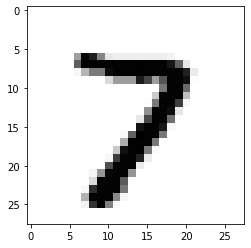

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# %matplotlib notebook
image_index = 4000 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

**Working with data**

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


**Model Building**

In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2083 - accuracy: 0.9363
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0833 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0585 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0437 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0355 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0280 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0248 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0203 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0195 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 27s 14m

**Evaluating model performance on test data**

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0629 - accuracy: 0.9861


[0.0628741905093193, 0.9861000180244446]

1/1 [==============================] - 0s 77ms/step
9


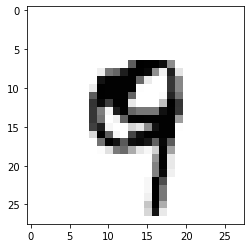

In [10]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())